In [1]:
import mlxtend
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import rc, font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 관련 용도
%config InlineBackend.figure_format = 'retina'

 

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [2]:
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [4]:
te = TransactionEncoder()

In [5]:
te_ary = te.fit(data).transform(data)
print(te_ary)

[[ True False False  True  True]
 [ True  True  True False False]
 [ True False  True  True  True]
 [False  True  True False False]]


In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [8]:
from mlxtend.frequent_patterns import apriori

In [9]:
result = apriori(df, min_support=0.5, use_colnames=True)
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(기저귀, 쥬스)"
8,0.50,"(맥주, 양상추)"
9,0.50,"(쥬스, 우유)"


In [10]:
## 쥬스+우유를 함께 산 사람에게 추천을 해준다고 한다면, 
## 맥주보다는 기저귀를 추천해야함.
## 지지도 기반으로 판단!

In [11]:
apriori(df, min_support=0.7, use_colnames=True)

,support,itemsets
0,0.75,(기저귀)
1,0.75,(양상추)


In [12]:
type(result) #result = apriori(df, min_support=0.5, use_colnames=True)

pandas.core.frame.DataFrame

In [13]:
# result에서 마지막 itemsets컬럼값 추출
## 쥬스, 우유와 함께 추천하면 좋을 item은??

In [14]:
choice = result.iloc[10, :]
choice

support               0.5
itemsets    (기저귀, 쥬스, 우유)
Name: 10, dtype: object

In [15]:
items = choice['itemsets']
items

frozenset({'기저귀', '우유', '쥬스'})

In [16]:
list(items)[2]

'우유'

In [17]:
## one-hot인코딩 방식의 테이블이 필요!!! 
## 실제로는 물건의 개수가 아주 많음.
## item 수 => 1조: 38441개의 여행지, 2조: 388개의 물건
## user 수 => 1조: 70000명, 2조: 800명
## 1조: 70000 * 38441, 2조: 800 * 388
## 1조인 경우 한 사람이 간 곳이 10개라고 한다면, 나머지는 0
## ==> 0이 2차원 데이터: 희소행렬(sparse matrix)
## TF-IDF, CounterVectorizor, TransactionEncoder

In [18]:
#!pip install gensim

In [19]:
from gensim.models import Word2Vec

In [20]:
## 자연어에서 특정한 단어(word)를 중심으로 앞 뒤의 단어를 유추(예측, 추론)할 때 사용됨.

In [21]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [22]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [23]:
##문장을 토큰으로 끊어내자.
sentences = [sentence.split(' ') for sentence in doc]
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [24]:
sentences2 = [sentence.split(' ') for sentence in doc2]
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [25]:
model = Word2Vec(window=1, min_count=1) ##특정한 단어의 앞뒤 단어를 유추가능.
## window: 유추하는 계산을 할 때 특정한 단어의 앞뒤 몇개를 가지고 계산을 할지의 단위
## min_count: 특정한 패턴의 출현 횟수

In [26]:
model2 = Word2Vec(window=1, min_count=1)
model2.build_vocab(sentences2)

In [27]:
model.build_vocab(sentences) #영문문장을 가지고 계산을 함.

In [28]:
## 특정한 단어를 주고 앞뒤 단어를 추론해보자.
model.wv.most_similar('say') ##비지도!!

[('or', 0.21617144346237183),
 ('hello', 0.0931011363863945),
 ('said', 0.09291724115610123),
 ('i', 0.07963486015796661),
 ('happy', 0.06285081058740616),
 ('you', 0.05433368682861328),
 ('he', 0.0270574688911438),
 ('white', 0.0161347147077322),
 ('and', -0.010839186608791351),
 ('unhappy', -0.027750365436077118)]

In [29]:
model.wv.most_similar('or')

[('say', 0.21617144346237183),
 ('he', 0.044689204543828964),
 ('happy', 0.015025186352431774),
 ('you', 0.010695194825530052),
 ('white', 0.001951059210114181),
 ('black', -0.03284314647316933),
 ('goodbye', -0.0455227792263031),
 ('hello', -0.045689091086387634),
 ('i', -0.0742427185177803),
 ('said', -0.09326909482479095)]

In [30]:
## or단어 앞으로는 say가 나올 가능성이 제일 크고,
## or단어 뒤로는 black단어가 나올 가능성이 제일 큰 것을 알 수 있다.

In [31]:
model2.wv.most_similar('너는')

[('굿바이라고', 0.13725271821022034),
 ('나는', 0.06797593832015991),
 ('우리는', 0.03364057093858719),
 ('블랙으로', 0.009391184896230698),
 ('기쁘다고', 0.00831596553325653),
 ('슬퍼', 0.004503015894442797),
 ('헬로우라고', -0.0036444757133722305),
 ('했어.', -0.010839187540113926),
 ('했고,', -0.023671669885516167),
 ('슬프다고', -0.09575346857309341)]

In [32]:
## '너는' 한글 단어 앞으로 나올 단어로는 굿바이라고를 추천,
## '너는' 한글 단어 뒤로 나올 단어로는 헬로우라고를 추천

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [34]:
tfidf = TfidfVectorizer(stop_words='english') #불용어처리가능한 ifidf객체 생성
##tfidf는 빈도수를 구하긴 하지만, 문서마다 자주 등장하는 문서는 각 문서를 구분할 단어로 사용하기는
##부적합하여 가중치를 낮추어 계산

In [35]:
tfidf_matrix = tfidf.fit_transform(doc)
tfidf_matrix

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [36]:
## 3 x 9에서
## 3은 문서의 개수
## 9는 단어의 개수

In [37]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [38]:
## 문서간의 유사도를 구해봅시다.!!
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [39]:
## 행은 문서1, 문서2, 문서3
## 열도 문서1, 문서2, 문서3
## 문서1 + 문서2: 0.21
## 문서1 + 문서3: 0.21
## 문서2 + 문서3: 0.10
## 문서1과 2, 문서1과 3이 유사하다.
## 문서2와 3은 유사하지 않다.

In [40]:
## 1-1.모든 장바구니 유사도를 구해보세요.
## 1-2.유사도를 그래프로 비교해주세요. 
## 2.장바구니 1번과 제일 유사도가 높은 장바구니를 찾아서
## 3.장바구니 1번에게 추천해주고 싶은 item을 추천해주세요.

In [41]:
cosine_similarity(df, df) #TransactionEncoding한 것으로 사용!

array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

In [42]:
## 장바구니 1번 + 2번 : 0.33
## 장바구니 1번 + 3번 : 0.87
## 장바구니 1번 + 4번 : 0.00
## 장바구니 2번 + 3번 : 0.58
## 장바구니 2번 + 4번 : 0.82
## 장바구니 3번 + 4번 : 0.35

In [43]:
basket_name = ['1번 + 2번', '1번 + 3번', '1번 + 4번', '2번 + 3번', '2번 + 3번', '3번 + 4번']
similar = [0.33, 0.87, 0.00, 0.58, 0.82, 0.35] 

In [44]:
basket_df = pd.DataFrame(data = {'basket_name' : basket_name, 'similar' : similar})
basket_df

,basket_name,similar
0,1번 + 2번,0.33
1,1번 + 3번,0.87
2,1번 + 4번,0.00
3,2번 + 3번,0.58
4,2번 + 3번,0.82
5,3번 + 4번,0.35


In [45]:
colors = ['y','r', 'C2', '#e35f62', 'g', 'b']

<BarContainer object of 6 artists>

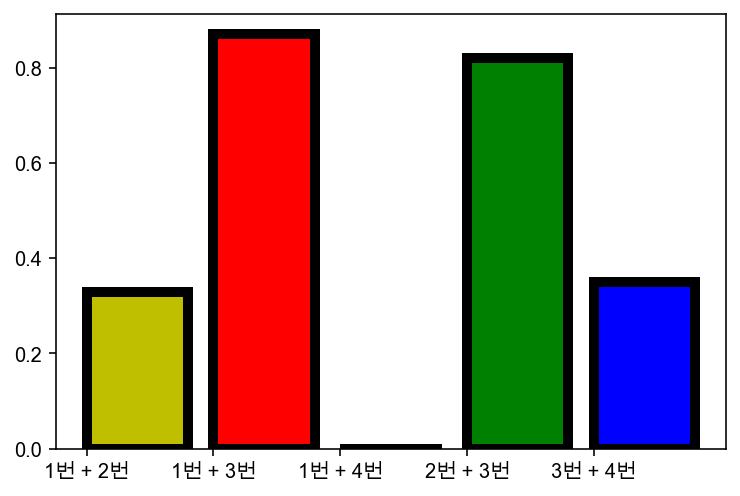

In [46]:
plt.bar(basket_df['basket_name'], 
        basket_df['similar'], 
        align='edge',
        edgecolor='black',
        linewidth=5,
        color=colors)

In [47]:
## TransactionEncoder : one-hot
## CounterVectorizer : count amount
## TF-IDFVectorizer : reduce most frequency weight

In [48]:
## 2.장바구니 1번과 제일 유사도가 높은 장바구니를 찾아서
## 3.장바구니 1번에게 추천해주고 싶은 item을 추천해주세요.

In [49]:
basket_cosine = cosine_similarity(df, df)
basket_cosine

array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

In [50]:
basket_cosine[0]

array([1.        , 0.33333333, 0.8660254 , 0.        ])

In [51]:
basket_cosine[0][1:]

array([0.33333333, 0.8660254 , 0.        ])

In [52]:
max_idx = np.argmax(basket_cosine[0][1:])
print('장바구니 번호: ', max_idx + 1 + 1, '번')

장바구니 번호:  3 번


In [53]:
data[0], data[2]

(['우유', '기저귀', '쥬스'], ['우유', '양상추', '기저귀', '쥬스'])

In [54]:
## 3번 장바구니에서 1번 장바구니를 빼면 1번이 아직 사지 않은 물건들을 확인할 수 있음.
## 리스트는 '-'를 지원하지 않아, set(집합)으로 형변환함.
rec_item = set(data[2]) - set(data[0])
rec_item2 = rec_item.pop()
rec_item2

'양상추'

In [55]:
print('1번 장바구니 사용자에게 ' + str(rec_item2) + '를 추천합니다.')

1번 장바구니 사용자에게 양상추를 추천합니다.


In [120]:
item1 = 'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/pd/22/4/4/5/8/1/2/IXzJd/4068445812_B.jpg'
item2 = 'http://img2.tmon.kr/cdn3/deals/2021/04/01/3379792506/3379792506_front_d267e39601.jpg'
item3 = 'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/dl/v2/5/7/8/5/4/8/GRFdv/2058578548_140045682.jpg'
item4 = 'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/pd/22/7/4/6/8/2/8/uCWDR/3889746828_B.jpg'
item0 = 'https://ak.picdn.net/shutterstock/videos/26680285/thumb/1.jpg'

In [109]:
def set_img(rec_item2):
    rec_item_img = item0
    if rec_item2 == '양상추':
        rec_item_img = item1
    elif rec_item2 == '우유':
        rec_item_img = item2
    elif rec_item2 == '기저귀':
        rec_item_img = item3
    else:
        rec_item_img = item4
    return rec_item_img
rec_item_img2 = set_img(rec_item2)
rec_item_img2

'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/pd/22/4/4/5/8/1/2/IXzJd/4068445812_B.jpg'

<img src=http://img3.tmon.kr/cdn4/deals/2022/05/09/9469615214/front_fd310_mbxua.jpg width=300 height=300>

In [110]:
from IPython.display import Image

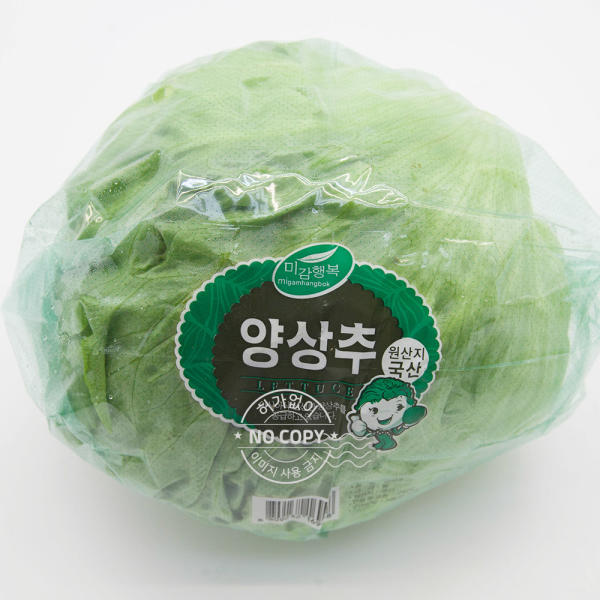

In [111]:
Image(rec_item_img2)

In [112]:
basket_cosine[3] ##장바구니 4번의 유사 장바구니 찾기

array([0.        , 0.81649658, 0.35355339, 1.        ])

In [113]:
basket_cosine[3][:-1]

array([0.        , 0.81649658, 0.35355339])

In [114]:
max_idx = np.argmax(basket_cosine[3][:-1])
print('장바구니 번호: ', max_idx)

장바구니 번호:  1


In [115]:
data[3], data[1]

(['양상추', '맥주'], ['양상추', '기저귀', '맥주'])

In [116]:
rec_item3 = set(data[1]) - set(data[3])
rec_item4 = rec_item3.pop()
rec_item4

'기저귀'

In [121]:
rec_item_img2 = set_img(rec_item4)
rec_item_img2

'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/dl/v2/5/7/8/5/4/8/GRFdv/2058578548_140045682.jpg'

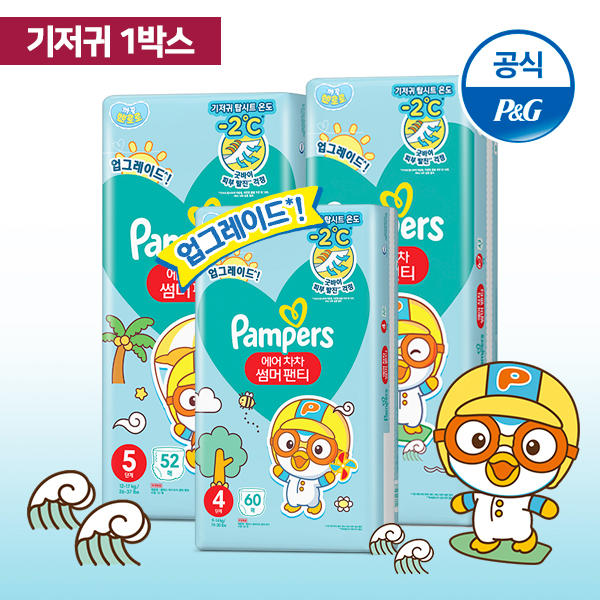

In [122]:
Image(rec_item_img2)